## Importing libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify
films = pd.read_csv('films_clean.csv')
genres = pd.read_csv('film_genres.csv')
genres_names = pd.read_csv('genres_names.csv')
country_names = pd.read_csv('countries_names.csv')
film_country = pd.read_csv('film_country.csv')

In [13]:
films

,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count,year,director,director_gender,prod_countries
0,"Comedy, Romance",11860,English,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","Germany, United States of America",127.0,2,Sabrina,6.2,141.0,1995,Sydney Pollack,male,Germany
1,"Comedy, Horror",12110,English,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","France, United States of America",88.0,2,Dracula: Dead and Loving It,5.7,210.0,1995,Mel Brooks,male,France
2,"Action, Adventure",1408,English,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","Germany, France, Italy, United States of America",119.0,2,Cutthroat Island,5.7,137.0,1995,Renny Harlin,male,France
3,"Drama, Crime",524,English,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","France, United States of America",178.0,1,Casino,7.8,1343.0,1995,Martin Scorsese,male,France
4,"Drama, Romance",4584,English,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,"[{'name': 'Columbia Pictures Corporation', 'id...","United Kingdom, United States of America",136.0,1,Sense and Sensibility,7.2,364.0,1995,Ang Lee,male,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,"Drama, Thriller, Mystery, Horror",365432,English,The Sublet,The Sublet is a suspense driven psychological ...,1.339355,"[{'name': 'Black Fawn Films', 'id': 9315}, {'n...",Canada,82.0,2,The Sublet,6.5,4.0,2015,John Ainslie,male,Canada
9575,"Action, Thriller, Mystery, Horror",45527,English,The Final Storm,A stranger named Silas flees from a devastatin...,1.270832,[{'name': 'Boll Kino Beteiligungs GmbH & Co. K...,"Germany, Canada",92.0,1,The Final Storm,3.7,11.0,2010,Uwe Boll,male,Canada
9576,"Drama, Family, TV Movie",39562,English,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],Canada,89.0,1,To Be Fat Like Me,5.0,12.0,2007,Douglas Barr,male,Canada
9577,Comedy,14008,English,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...","United States of America, Canada",101.0,1,Cadet Kelly,5.2,145.0,2002,Larry Shaw,male,Canada


## Creating Exploitable Dataframes

In [14]:
film_genres = genres.merge(genres_names, on='genre_id')

In [15]:
film_genres

,film_id,genre_id,director_gender,genre
0,11860,2,male,Comedy
1,12110,2,male,Comedy
2,11010,2,male,Comedy
3,4482,2,female,Comedy
4,40154,2,male,Comedy
...,...,...,...,...
20876,68954,15,male,TV Movie
20877,447061,15,male,TV Movie
20878,46203,15,male,TV Movie
20879,32593,15,female,TV Movie


In [16]:
film_country[film_country['country_id'] == 41]

,film_id,country_id,director_gender
15080,105627,41,male
15081,234942,41,male


In [17]:
film_countries = film_country.merge(country_names, on='country_id')

In [18]:
film_countries[film_countries['country'] == 'United Kingdom']

,film_id,country_id,director_gender,country
6251,4584,68,male,United Kingdom
6252,17015,68,male,United Kingdom
6253,47018,68,male,United Kingdom
6254,687,68,male,United Kingdom
6255,31174,68,male,United Kingdom
...,...,...,...,...
8713,31486,68,male,United Kingdom
8714,59958,68,male,United Kingdom
8715,28669,68,male,United Kingdom
8716,39164,68,male,United Kingdom


In [19]:
film_countries.groupby('country')['film_id'].count().sort_values(ascending=False)[:18
                                                                                                    ]

country
United Kingdom              2467
France                      2084
United States of America    1929
Germany                     1235
Italy                       1003
Canada                       951
Japan                        552
Spain                        444
Sweden                       396
India                        357
Russia                       283
Australia                    272
Hong Kong                    239
South Korea                  233
Belgium                      199
Denmark                      153
Mexico                       146
China                        131
Name: film_id, dtype: int64

## Splitting the dataset (male directors, female directors)

In [20]:
male_directed = films[films['director_gender'] == 'male']
female_directed = films[films['director_gender'] == 'female']

In [21]:
male_directed.shape

(8917, 17)

In [22]:
female_directed.shape

(662, 17)

In [23]:
country_female = film_countries[film_countries['director_gender'] == 'female']
country_male = film_countries[film_countries['director_gender'] == 'male']

## Visualizations

## Pie Chart

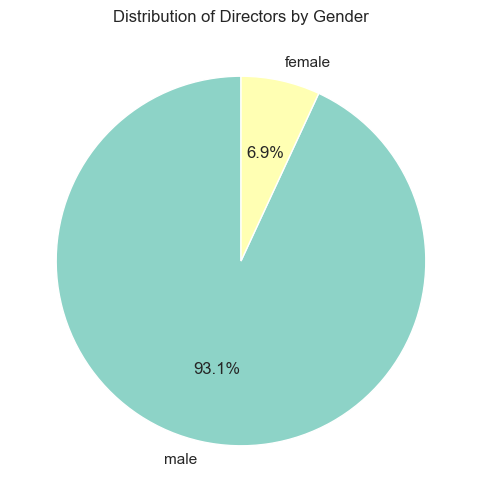

In [24]:
sorted_counts = films['director_gender'].value_counts()
labels = sorted_counts.index

plt.figure(figsize=(8, 6))  
colors = sns.color_palette('Set3')  

plt.pie(sorted_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Directors by Gender')

plt.show()


## Treemaps

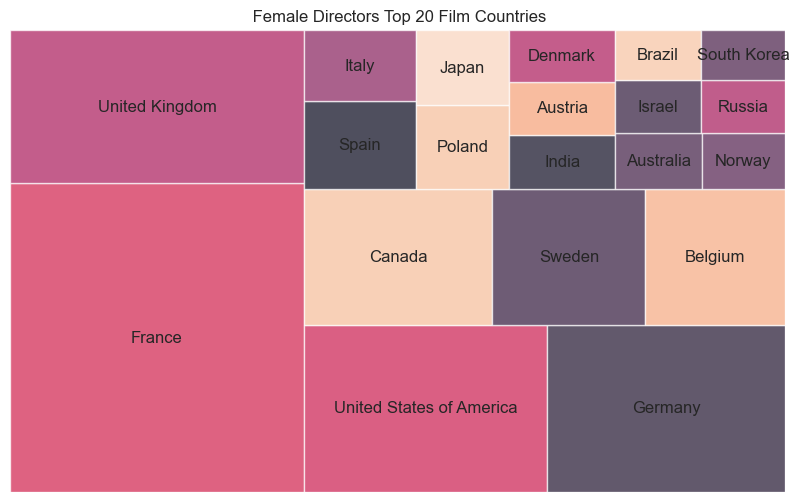

In [25]:
top10_genres_both = country_female.groupby('country')['film_id'].sum().sort_values(ascending=False)[:20]

labels = top10_genres_both.index
sizes = top10_genres_both.values

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)

cmap = sns.color_palette("pastel",len(labels))
sns.set_palette(cmap)

plt.axis('off')
plt.title(' Female Directors Top 20 Film Countries')

plt.show()

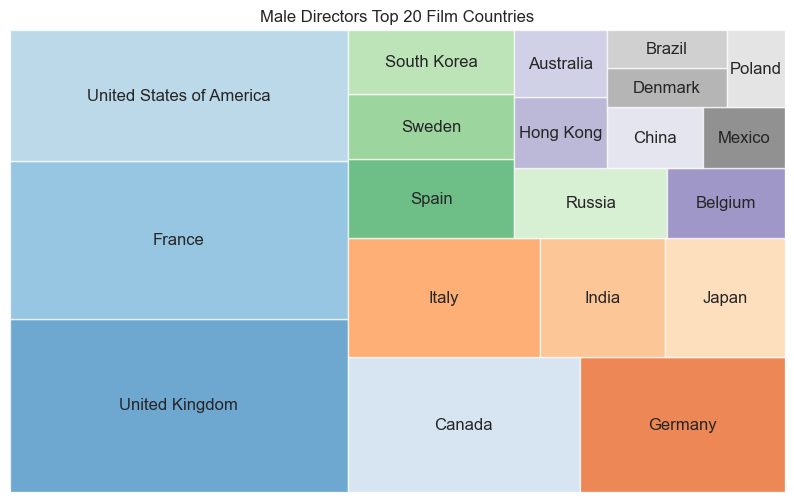

In [26]:
top10_genres_both = country_male.groupby('country')['film_id'].sum().sort_values(ascending=False)[:20]

cmap = plt.cm.tab20c

labels = top10_genres_both.index
sizes = top10_genres_both.values
colors = [cmap(i) for i in range(len(labels))]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)

plt.axis('off')
plt.title('Male Directors Top 20 Film Countries')

plt.show()

## Density Charts

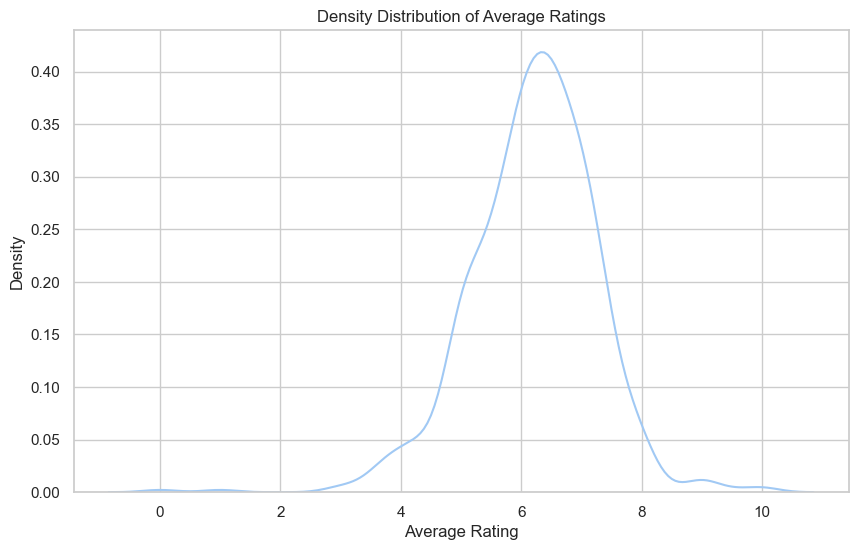

In [27]:
plt.figure(figsize=(10, 6)) 

sns.kdeplot(data=female_directed, x='vote_average')

plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Density Distribution of Average Ratings')

plt.show()

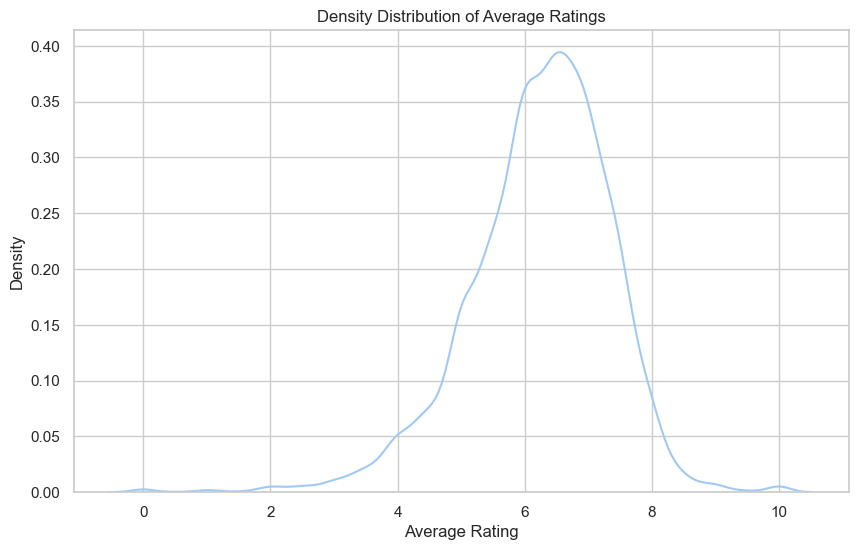

In [28]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=male_directed, x='vote_average')

plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Density Distribution of Average Ratings')

plt.show()

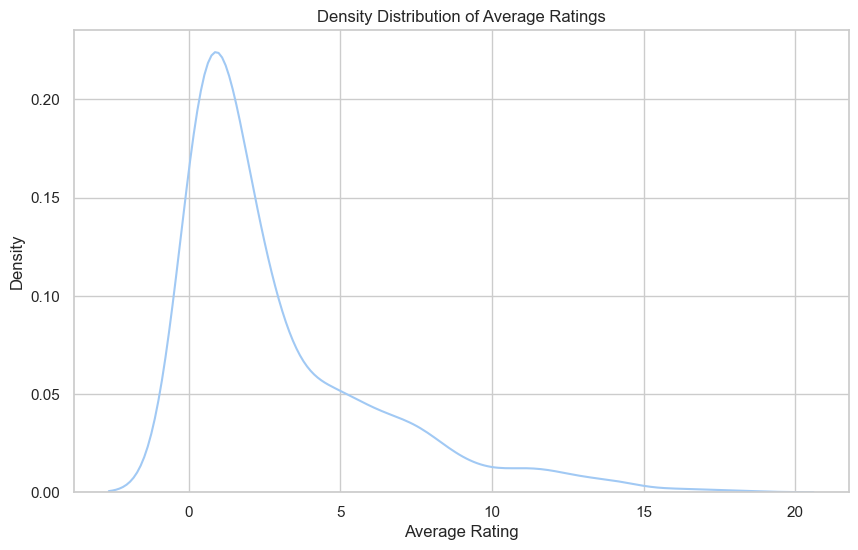

In [29]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=female_directed, x='popularity')

plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Density Distribution of Average Ratings')

plt.show()

## Line Charts

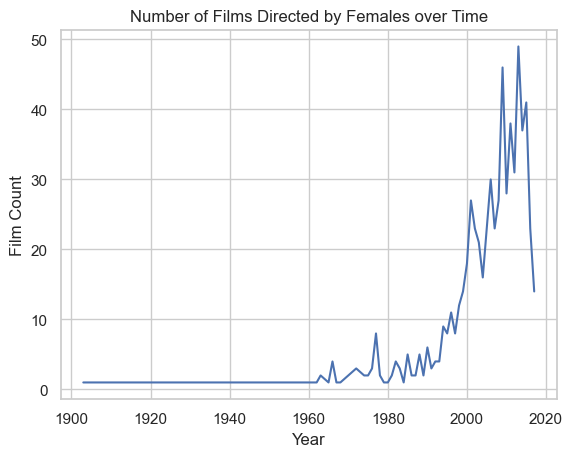

In [30]:
film_count = female_directed.groupby('year')['id'].count().reset_index()

sns.lineplot(data=film_count, x='year', y='id', color='b')

plt.xlabel('Year')
plt.ylabel('Film Count')
plt.title('Number of Films Directed by Females over Time')

plt.show()

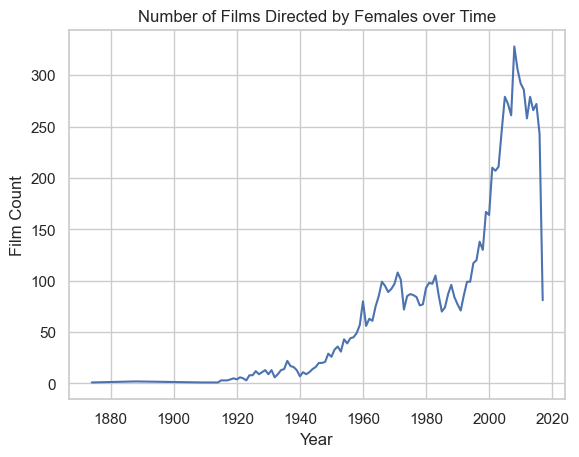

In [31]:
film_count = male_directed.groupby('year')['id'].count().reset_index()

sns.lineplot(data=film_count, x='year', y='id', color='b')

plt.xlabel('Year')
plt.ylabel('Film Count')
plt.title('Number of Films Directed by Females over Time')

plt.show()

## Histograms

In [32]:
film_count = female_directed.groupby('year')['film_id'].count()

plt.hist(film_count.index, bins=len(film_count), weights=film_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Female Directed Movies per Year')
plt.show()

KeyError: 'Column not found: film_id'

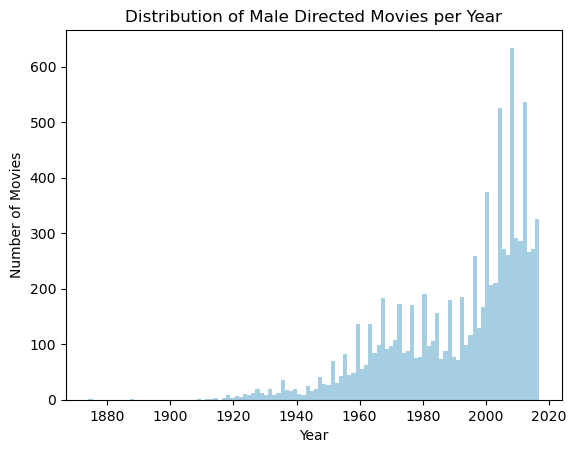

In [ ]:
film_count = male_directed.groupby('year')['film_id'].count()

plt.hist(film_count.index, bins=len(film_count), weights=film_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Male Directed Movies per Year')
plt.show()

## Bar charts

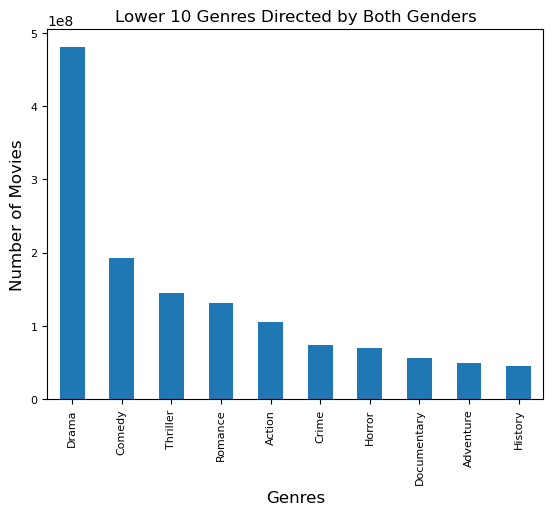

In [ ]:
top10_genres_both = film_genres.groupby('genre')['film_id'].sum().sort_values(ascending=False)[:10]
plt.show()
ax = top10_genres_both.plot(kind='bar', fontsize=8)
ax.set_title('Lower 10 Genres Directed by Both Genders', fontsize=12)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

#'A film can have multiple genres.'

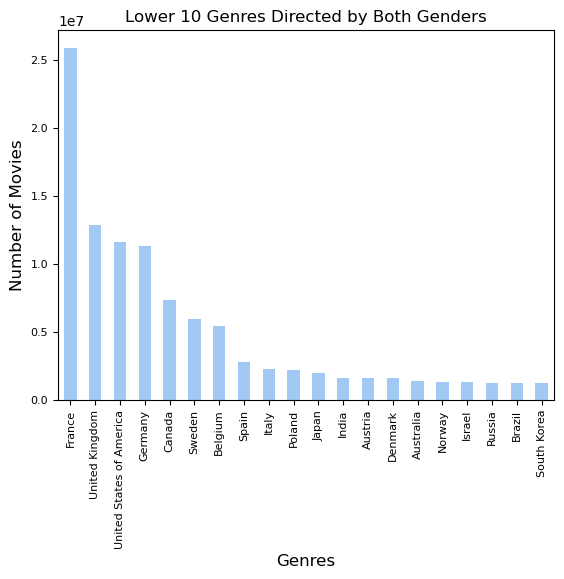

In [ ]:
top_languages = male_directed.groupby('original_language')['id'].sum().sort_values(ascending=False)[:10]
ax = top10_genres_both.plot(kind='bar', fontsize=8)
ax.set_title('Lower 10 Genres Directed by Both Genders', fontsize=12)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

plt.show()

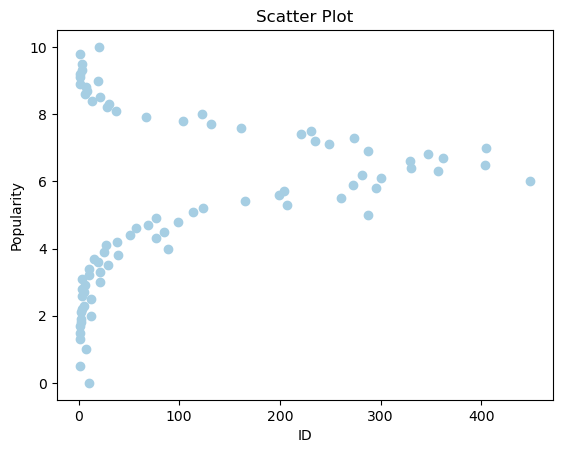

In [ ]:

grouped_data = male_directed.groupby('vote_average')['id'].count()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['vote_average'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

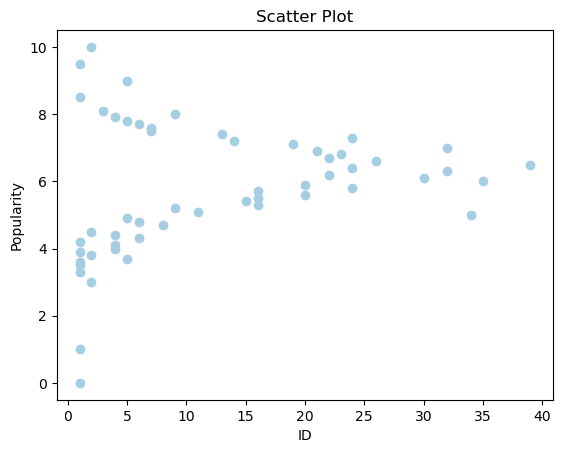

In [ ]:

grouped_data = female_directed.groupby('vote_average')['id'].count()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['vote_average'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

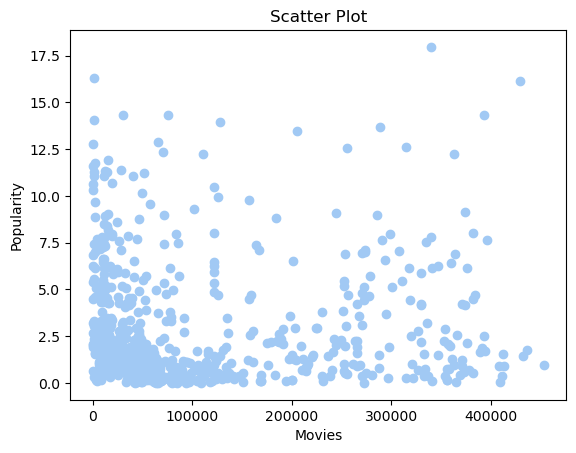

In [ ]:

grouped_data = female_directed.groupby('popularity')['id'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

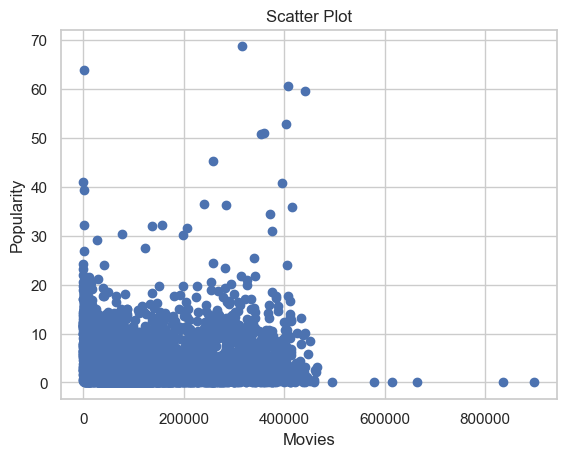

In [ ]:

grouped_data = male_directed.groupby('popularity')['id'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

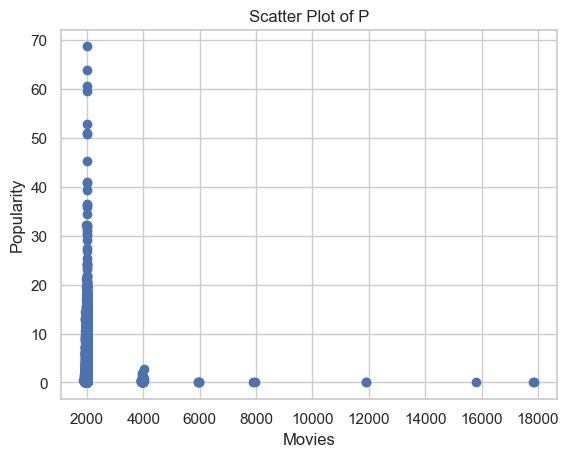

In [ ]:

grouped_data = male_directed.groupby('popularity')['year'].sum()
df = grouped_data.reset_index()
plt.scatter(df['year'], df['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Scatter Plot of P')
plt.show()

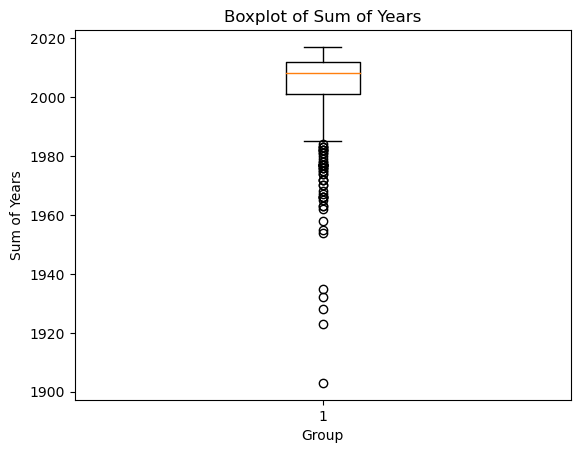

In [ ]:
grouped_data = female_directed.groupby('id')['year'].sum()

values = grouped_data.values.tolist()

fig, ax = plt.subplots()

ax.boxplot(values)

ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Boxplot of Sum of Years')

plt.show()






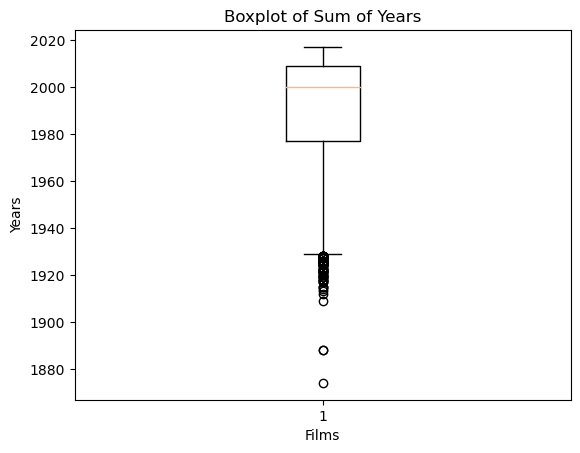

In [ ]:
grouped_data = male_directed.groupby('id')['year'].sum()

values = grouped_data.values.tolist()

fig, ax = plt.subplots()

ax.boxplot(values)

ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Boxplot of Sum of Years')

plt.show()


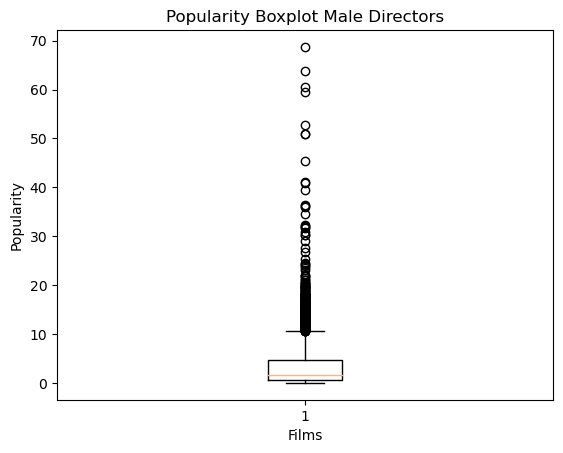

In [ ]:
grouped_data = male_directed.groupby('id')['popularity'].sum()

values = grouped_data.values.tolist()

fig, ax = plt.subplots()

ax.boxplot(values)

ax.set_xlabel('Films')
ax.set_ylabel('Popularity')
ax.set_title('Popularity Boxplot Male Directors')

plt.show()

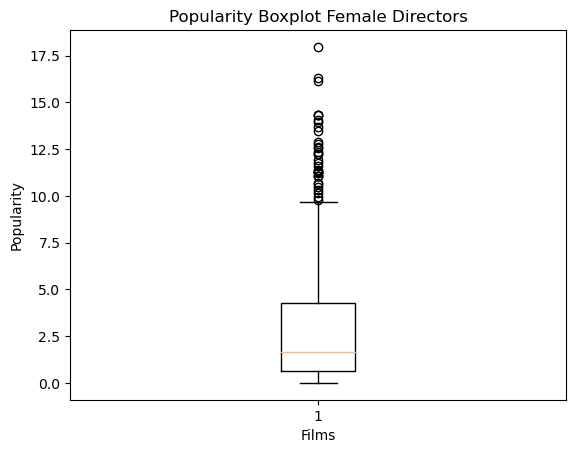

In [ ]:
grouped_data = female_directed.groupby('id')['popularity'].sum()

values = grouped_data.values.tolist()

fig, ax = plt.subplots()

ax.boxplot(values)

ax.set_xlabel('Films')
ax.set_ylabel('Popularity')
ax.set_title('Popularity Boxplot Female Directors')

plt.show()

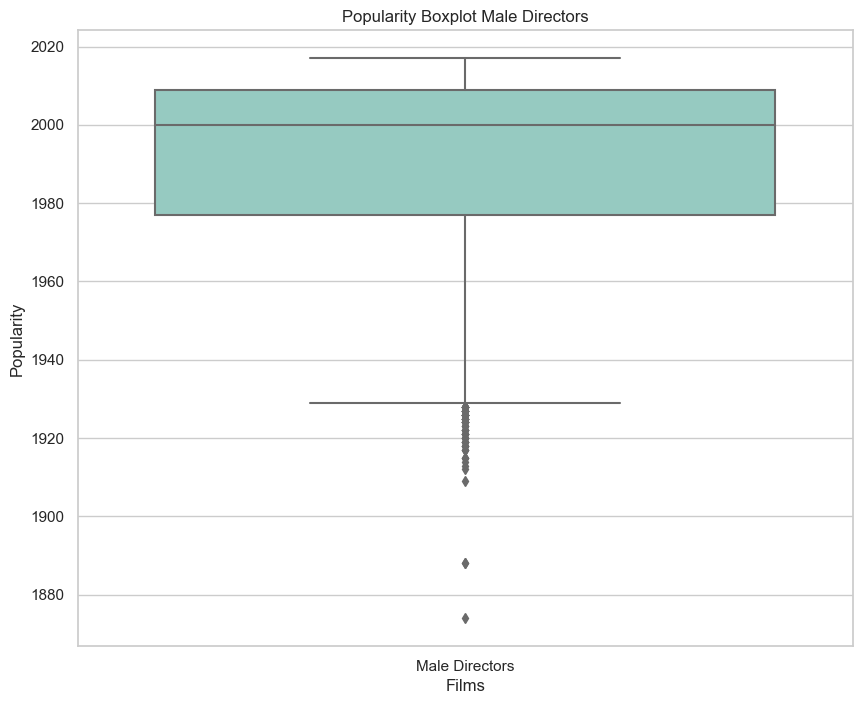

In [ ]:
grouped_data = male_directed.groupby('id')['year'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Male Directors'] * len(values),
                   'Popularity': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
ax = sns.boxplot(x='Films', y='Popularity', data=df, palette='Set3')
ax.set_xlabel('Films')
ax.set_ylabel('Popularity')
ax.set_title('Popularity Boxplot Male Directors')

plt.show()

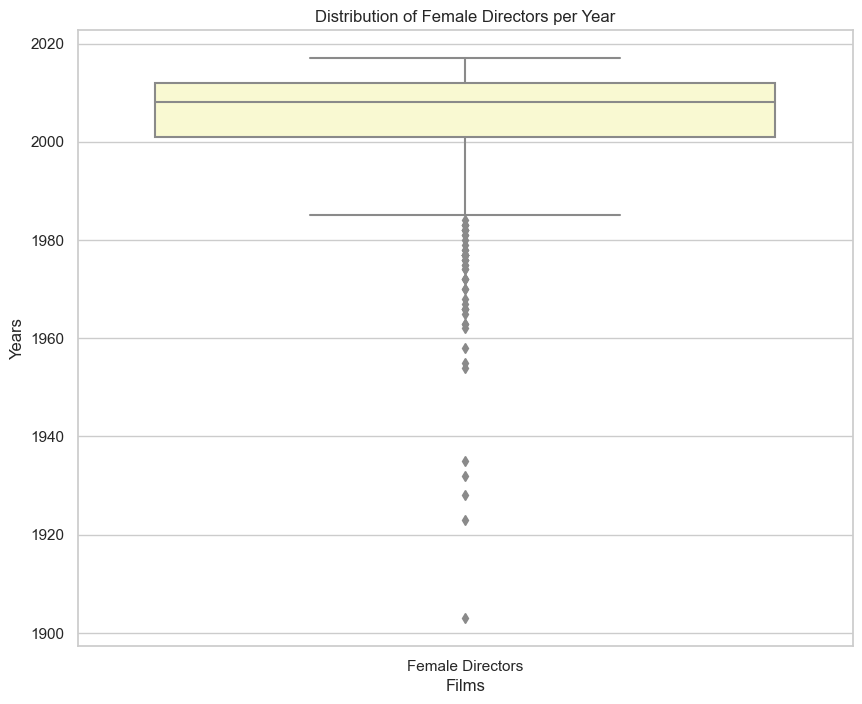

In [36]:
grouped_data = female_directed.groupby('id')['year'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Female Directors'] * len(values),
                   'Year': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
custom_palette = ['#FFFFCC']
ax = sns.boxplot(x='Films', y='Year', data=df, palette=custom_palette)
ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Distribution of Female Directors per Year')

plt.show()

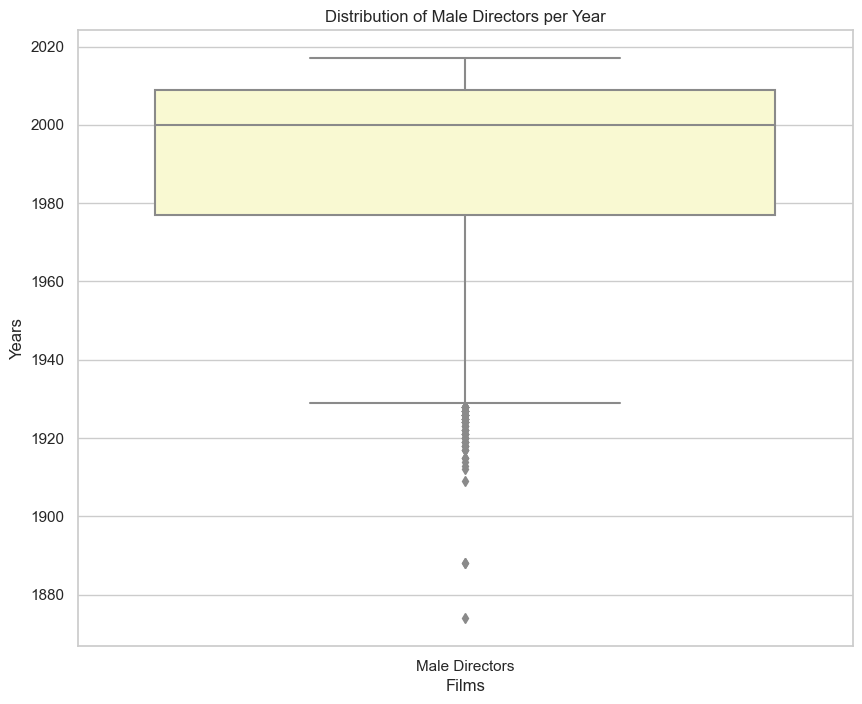

In [37]:
grouped_data = male_directed.groupby('id')['year'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Male Directors'] * len(values),
                   'Year': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
ax = sns.boxplot(x='Films', y='Year', data=df, palette=custom_palette)
ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Distribution of Male Directors per Year')

plt.show()



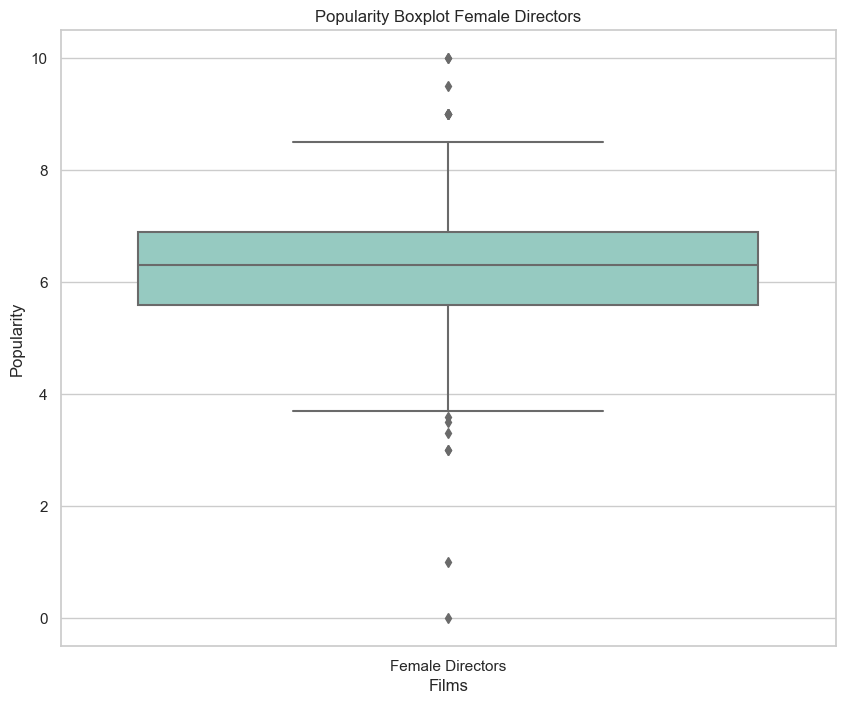

In [ ]:
grouped_data = female_directed.groupby('id')['vote_average'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Female Directors'] * len(values),
                   'Popularity': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
ax = sns.boxplot(x='Films', y='Popularity', data=df, palette='Set3')
ax.set_xlabel('Films')
ax.set_ylabel('Popularity')
ax.set_title('Popularity Boxplot Female Directors')

plt.show()

In [ ]:
multiculture = female_directed[female_directed['spoken_languages'] > 6]

sns.boxplot(data=multiculture, x='title', y='spoken_languages')
plt.ylim((5,10))
plt.xticks(rotation=90)
plt.title('Top Multi-cultural Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Spoken Languages')

ValueError: min() arg is an empty sequence

<AxesSubplot:xlabel='year', ylabel='popularity'>

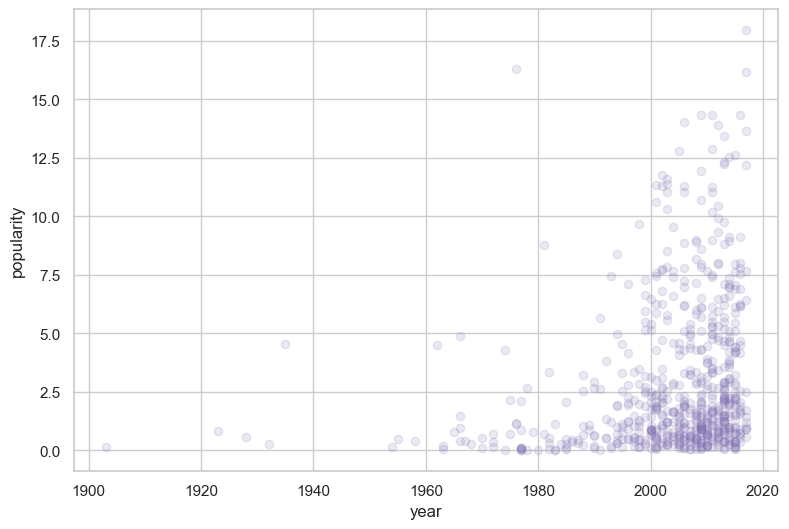

In [ ]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=female_directed, x='year', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

<AxesSubplot:xlabel='year', ylabel='popularity'>

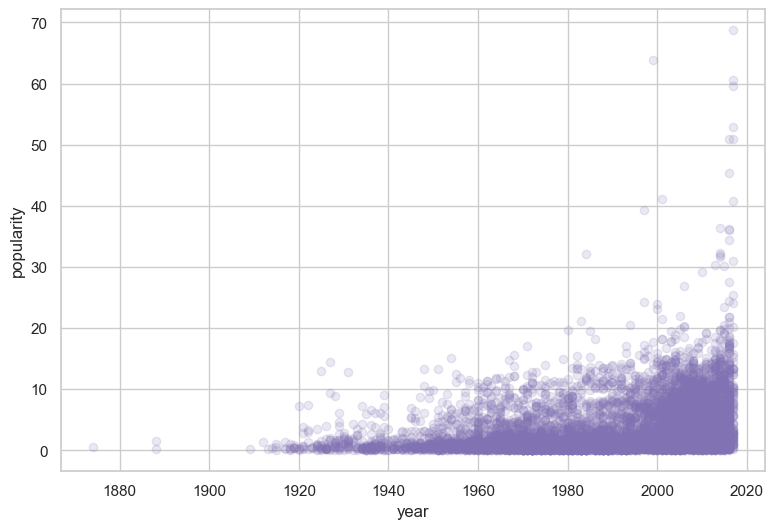

In [ ]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=male_directed, x='year', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

In [ ]:
films.dtypes

genres                   object
id                        int64
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
runtime                 float64
spoken_languages          int64
title                    object
vote_average            float64
vote_count              float64
year                      int64
director                 object
director_gender          object
prod_countries           object
dtype: object

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

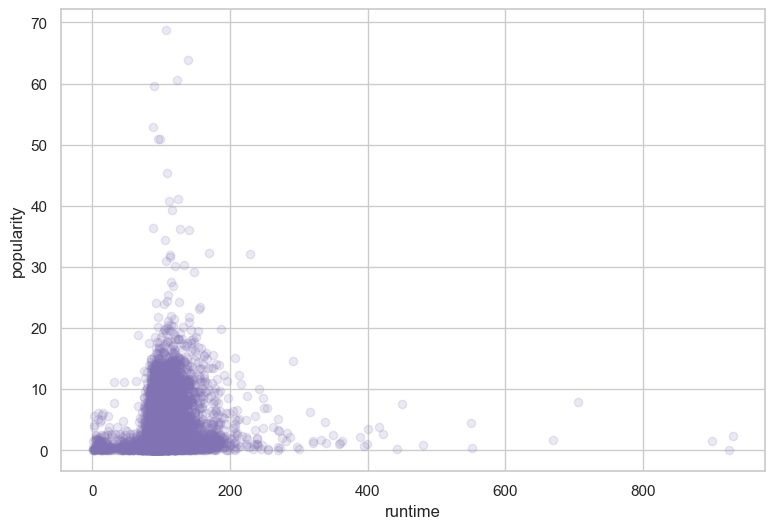

In [ ]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=male_directed, x='runtime', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

<AxesSubplot:>

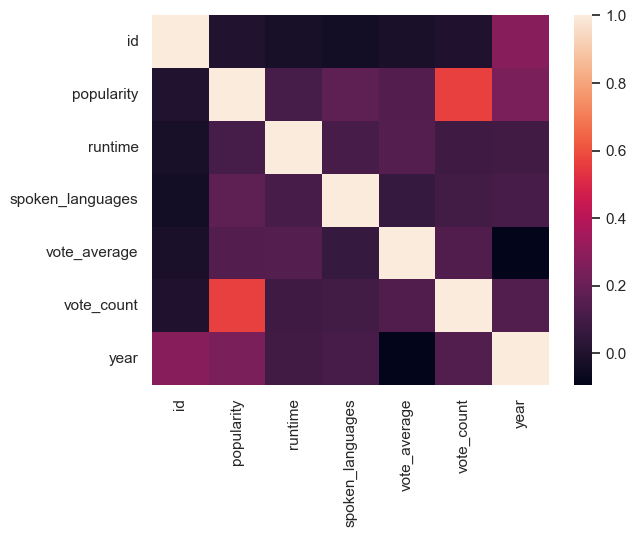

In [ ]:
sns.heatmap(films.corr())

Text(0, 0.5, 'Countries')

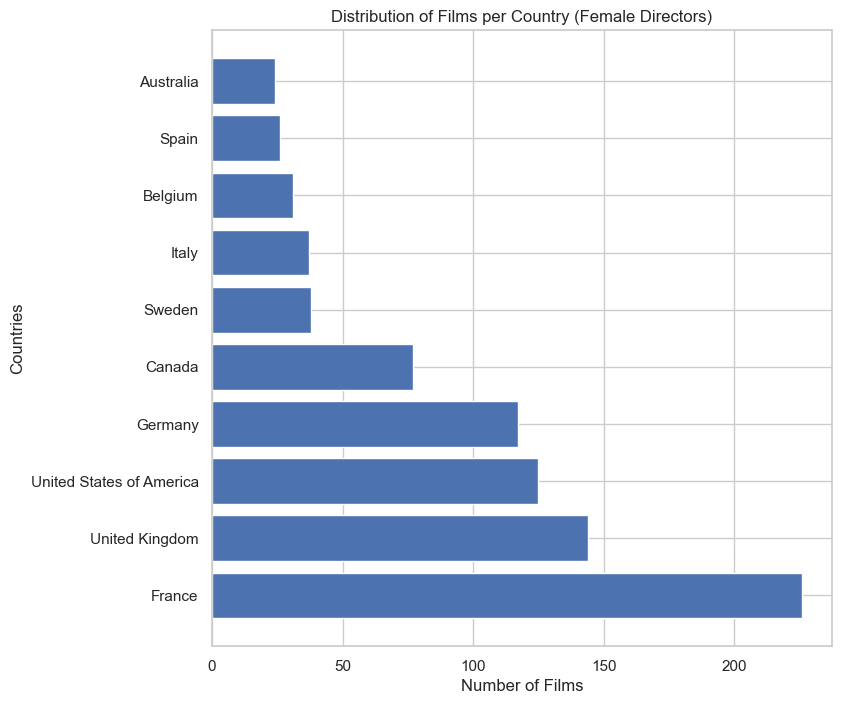

In [ ]:
df_country = country_female['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(8,8))
bars = plt.barh(df_country.index, df_country)
plt.title('Distribution of Films per Country (Female Directors)')
plt.xlabel('Number of Films')
plt.ylabel('Countries')


In [ ]:
country_female['country'].value_counts()

France                      226
United Kingdom              144
United States of America    125
Germany                     117
Canada                       77
Sweden                       38
Italy                        37
Belgium                      31
Spain                        26
Australia                    24
Japan                        20
Denmark                      18
India                        14
South Korea                  13
Austria                      12
Argentina                    12
Poland                       12
Netherlands                  12
Russia                       10
Switzerland                  10
Ireland                       9
Finland                       9
Norway                        8
Czech Republic                8
Israel                        7
New Zealand                   7
China                         7
Hong Kong                     6
Brazil                        6
Philippines                   5
South Africa                  5
Luxembou

Text(0, 0.5, 'Countries')

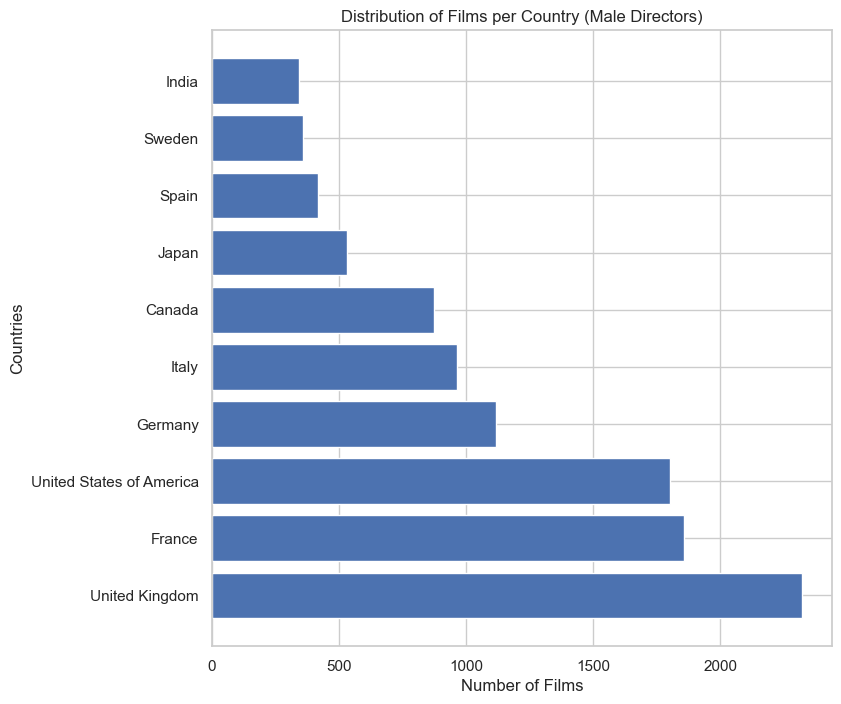

In [ ]:
df_country = country_male['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(8,8))
bars = plt.barh(df_country.index, df_country)
plt.title('Distribution of Films per Country (Male Directors)')
plt.xlabel('Number of Films')
plt.ylabel('Countries')


In [ ]:
male_directed['director'].value_counts()

Werner Herzog               44
Jean-Luc Godard             39
Ingmar Bergman              36
Rainer Werner Fassbinder    29
Akira Kurosawa              28
                            ..
Luis de la Madrid            1
Gonzalo López-Gallego        1
Joshua Safdie                1
Jean-Claude Van Damme        1
Larry Shaw                   1
Name: director, Length: 3404, dtype: int64